In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
# Возьмите датасет с цветками iris’а

from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
# Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

df_iris = df_iris[['sepal length (cm)', 'sepal width (cm)']]
df_iris['variety'] = iris.target
df_iris.head(2)

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0


In [7]:
# Разделите данные на выборку для обучения и тестирования

from sklearn.model_selection import train_test_split

In [8]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)']]
y = df_iris['variety']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
# Постройте модель LDA

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
lda.predict(X_test)

array([2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1,
       2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2])

In [12]:
# Визуализируйте предсказания для тестовой выборки и центры классов

lda.means_

array([[5.03157895, 3.46842105],
       [5.87435897, 2.74615385],
       [6.57714286, 2.98285714]])

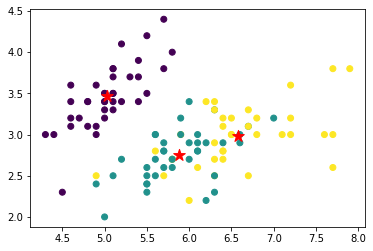

In [13]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [27]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

df_iris_02 = df_iris[['sepal length (cm)', 'sepal width (cm)']]
df_iris_02.head(2)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0


In [ ]:
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [28]:
from sklearn.cluster import KMeans

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_scaled = scaler.fit_transform(X)

In [32]:
kmeans = KMeans(n_clusters=3)

In [33]:
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

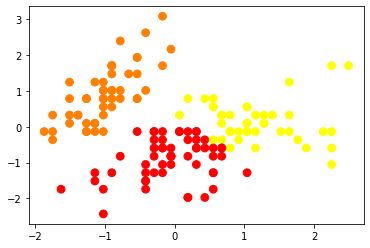

In [34]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)